# Plot the results of the training on the volcano data.

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from volcapy.grid.grid_from_dsm import Grid


data_folder = "/home/cedric/PHD/Dev/VolcapySIAM/data/InversionDatas/stromboli_173018/"

grid = Grid.load(os.path.join(data_folder, "grid.pickle"))
data_coords = np.load(os.path.join(data_folder, "niklas_data_coords_corrected_final.npy"))

results_folder = "/home/cedric/PHD/Dev/VolcapySIAM/reporting/universal_kriging/results/Stromboli/"
df = pd.read_pickle(os.path.join(results_folder, "train_res_cylindrical.pkl"))
train_df = df[df['nll'].notnull()]
df_const = pd.read_pickle(os.path.join(results_folder, "train_res_constant.pkl"))
train_df_const = df_const[df_const['nll'].notnull()]

In [26]:
train_df

,lambda0,sigma0,beta_hat,nll,train RMSE
0,1.0,1.0,"[[407.9349], [122.50429]]",363932.21875,2.5701666
1,1.0,36.871795,"[[594.2852], [46.972347]]",100276.695312,0.98639715
2,1.0,72.74359,"[[595.3283], [49.94771]]",41654.035156,0.44763497
3,1.0,108.615385,"[[594.90436], [51.560966]]",21006.039062,0.247128
4,1.0,144.487179,"[[594.55237], [52.405155]]",12150.014648,0.15620197
...,...,...,...,...,...
1589,3000.0,1041.282051,"[[212.77148], [423.8037]]",-727.440674,3.9279394
1592,3000.0,1148.897436,"[[-639.6135], [1150.3683]]",-1034.778809,24.108782
1596,3000.0,1292.384615,"[[2971.1562], [3114.6055]]",-1799.435913,526.1152
1597,3000.0,1328.25641,"[[575.9724], [218.92041]]",-861.481873,30.388636


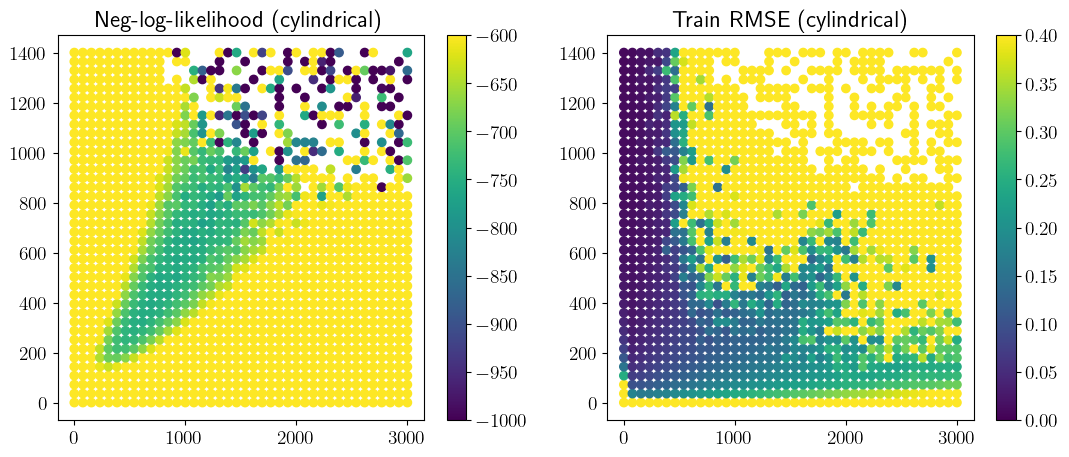

In [27]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (cylindrical)")
plt.subplot(122)
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (cylindrical)")
plt.colorbar()

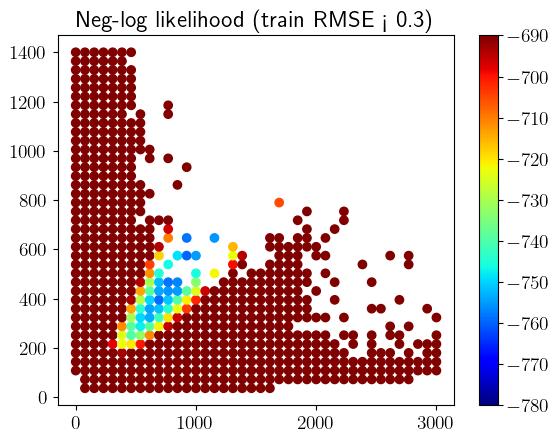

In [28]:
filtered_df = train_df[train_df['train RMSE'] <=0.3]
plt.scatter(filtered_df['lambda0'], filtered_df['sigma0'], c=filtered_df['nll'], vmax=-690, vmin=-780, cmap='jet')
plt.title("Neg-log likelihood (train RMSE < 0.3)")
plt.colorbar()

In [29]:
filtered_df[filtered_df['nll'] == filtered_df['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
496,923.769231,574.948718,"[[556.5835], [-267.1974]]",-759.856201,0.119797766


In [6]:
train_df[326:333]

,lambda0,sigma0,beta_hat,nll,train RMSE
326,616.179487,216.230769,"[[142.46613], [0.25048637]]",-678.067993,0.10440133
327,616.179487,252.102564,"[[122.24481], [0.2570374]]",-721.106567,0.1045366
328,616.179487,287.974359,"[[107.17139], [0.259997]]",-748.419434,0.13938849
329,616.179487,323.846154,"[[94.6918], [0.26234937]]",-760.521362,0.1602103
330,616.179487,359.717949,"[[69.25156], [0.27409136]]",-760.760376,0.4686037
331,616.179487,395.589744,"[[69.853516], [0.2681259]]",-755.899292,0.29830936
332,616.179487,431.461538,"[[63.229553], [0.2780465]]",-741.275513,0.26068476


## Model with constant only.

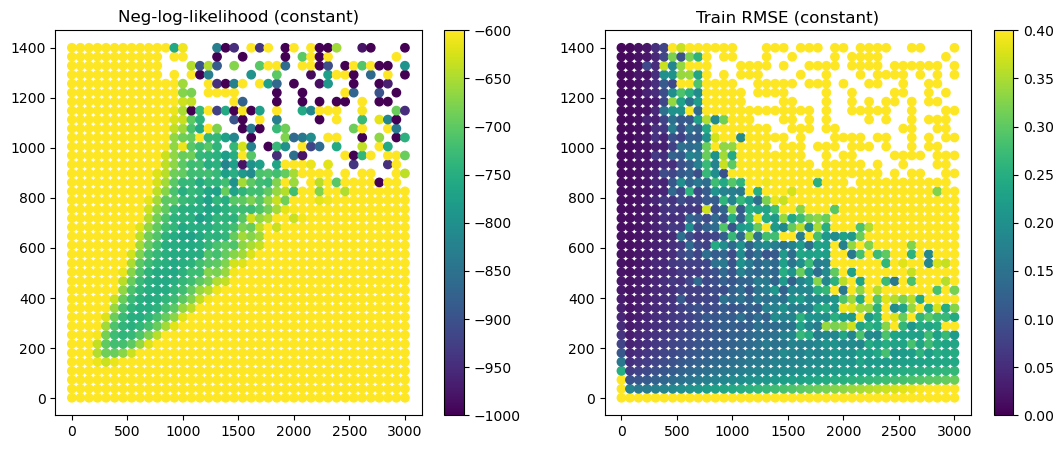

In [7]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(train_df_const['lambda0'], train_df_const['sigma0'], c=train_df_const['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (constant)")
plt.subplot(122)
plt.scatter(train_df_const['lambda0'], train_df_const['sigma0'], c=train_df_const['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (constant)")
plt.colorbar()

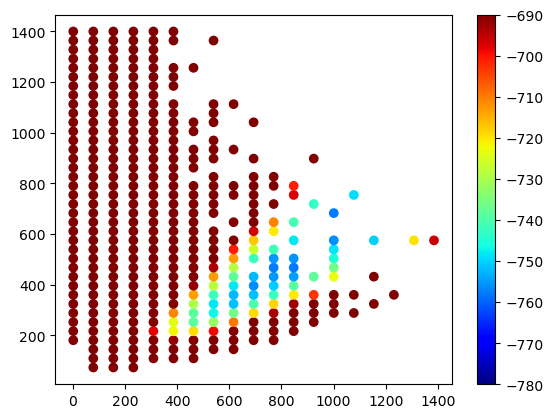

In [8]:
filtered_df_const = train_df_const[train_df_const['train RMSE'] <=0.12]
plt.scatter(filtered_df_const['lambda0'], filtered_df_const['sigma0'], c=filtered_df_const['nll'], vmax=-690, vmin=-780, cmap='jet')
plt.colorbar()

In [9]:
filtered_df_const[filtered_df_const['nll'] == filtered_df_const['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
453,846.871795,467.333333,[[544.8717]],-757.934753,0.09626736


## Model with trend along N41 fault line.

In [30]:
df_N41 = pd.read_pickle(os.path.join(results_folder, "train_res_N41.pkl"))

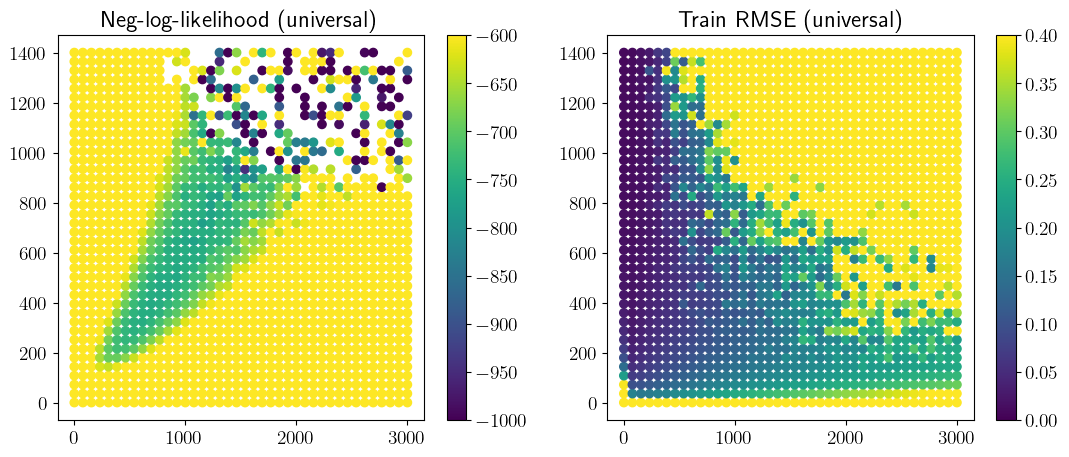

In [31]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(df_N41['lambda0'], df_N41['sigma0'], c=df_N41['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (universal)")
plt.subplot(122)
plt.scatter(df_N41['lambda0'], df_N41['sigma0'], c=df_N41['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (universal)")
plt.colorbar()

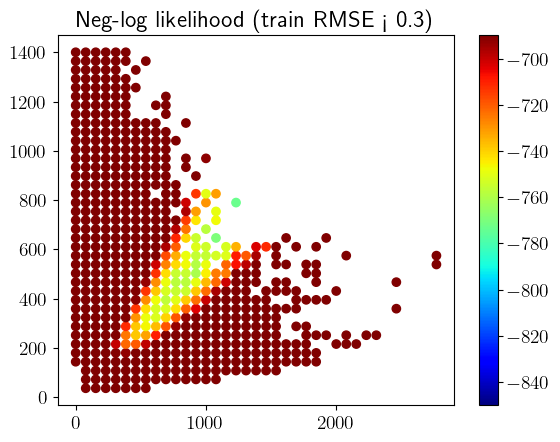

In [32]:
filtered_df_N41 = df_N41[df_N41['train RMSE'] <=0.2]
plt.scatter(filtered_df_N41['lambda0'], filtered_df_N41['sigma0'], c=filtered_df_N41['nll'], vmax=-690, vmin=-850, cmap='jet')
plt.title("Neg-log likelihood (train RMSE < 0.3)")
plt.colorbar()

In [33]:
# Find minimum.
filtered_df_N41[filtered_df_N41['nll'] == filtered_df_N41['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
662,1231.358974,790.179487,"[[531.21045], [42.35132]]",-773.418213,0.14387855


## Plot posterior means.

In [38]:
post_mean_cyl = np.load(os.path.join(results_folder, "post_mean_cyl.npy"))
post_mean_cst = np.load(os.path.join(results_folder, "post_mean_cst.npy"))
post_mean_N41 = np.load(os.path.join(results_folder, "post_mean_N41.npy"))

-400.0


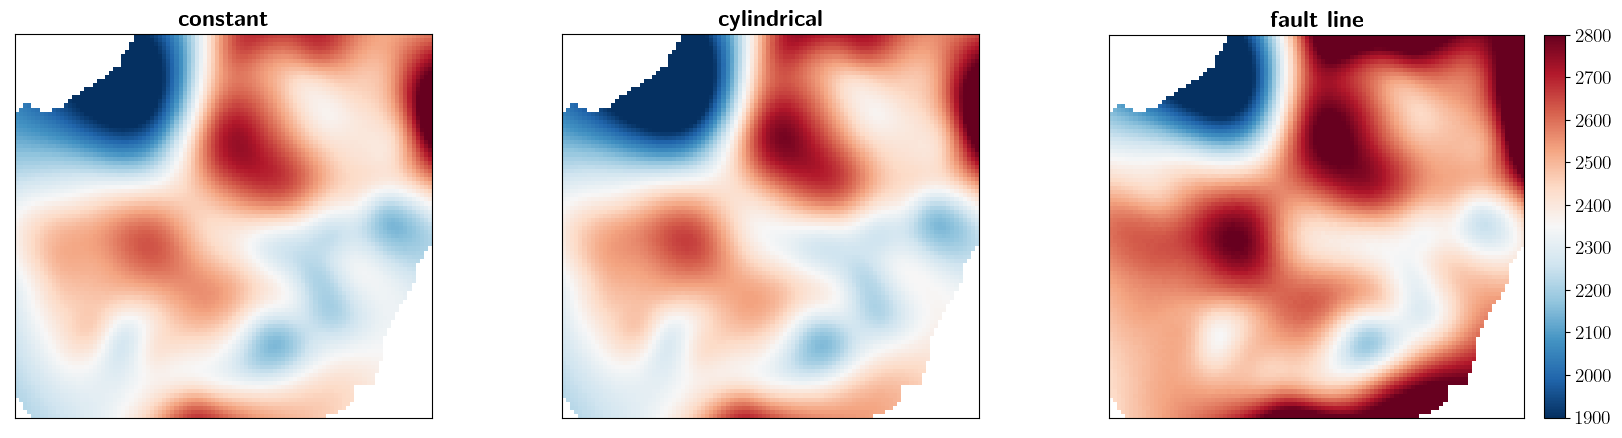

In [39]:
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['font.size'] = 14

from mpl_toolkits.axes_grid1 import make_axes_locatable

meshed_post_mean_cyl = grid.mesh_values(post_mean_cyl) + 1600
meshed_post_mean_cst = grid.mesh_values(post_mean_cst) + 1600
meshed_post_mean_N41 = grid.mesh_values(post_mean_N41) + 1600

zlevel = 8
print(grid.Z_mesh[0, 0, zlevel])


fig = plt.figure(figsize=(20, 8))                                          
plt.subplot(131)                                                      
ax = plt.imshow(meshed_post_mean_cst[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(ax, fraction=0.046, pad=0.04)
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{constant}$")

plt.subplot(132)                                                       
ax = plt.imshow(meshed_post_mean_cyl[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.colorbar(ax, fraction=0.046, pad=0.04)
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{cylindrical}$")


ax = plt.subplot(133)                                        
im = plt.imshow(meshed_post_mean_N41[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.title(r"$\textbf{fault line}$")
plt.yticks([])
plt.xticks([])

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size="5%", pad=0.2)

cbar1 = fig.colorbar(im, cax = cax2)

fig.delaxes(fig.axes[1])
fig.delaxes(fig.axes[2])


plt.savefig("posterior_means", bbox_inches='tight', dpi=200)

-100.0


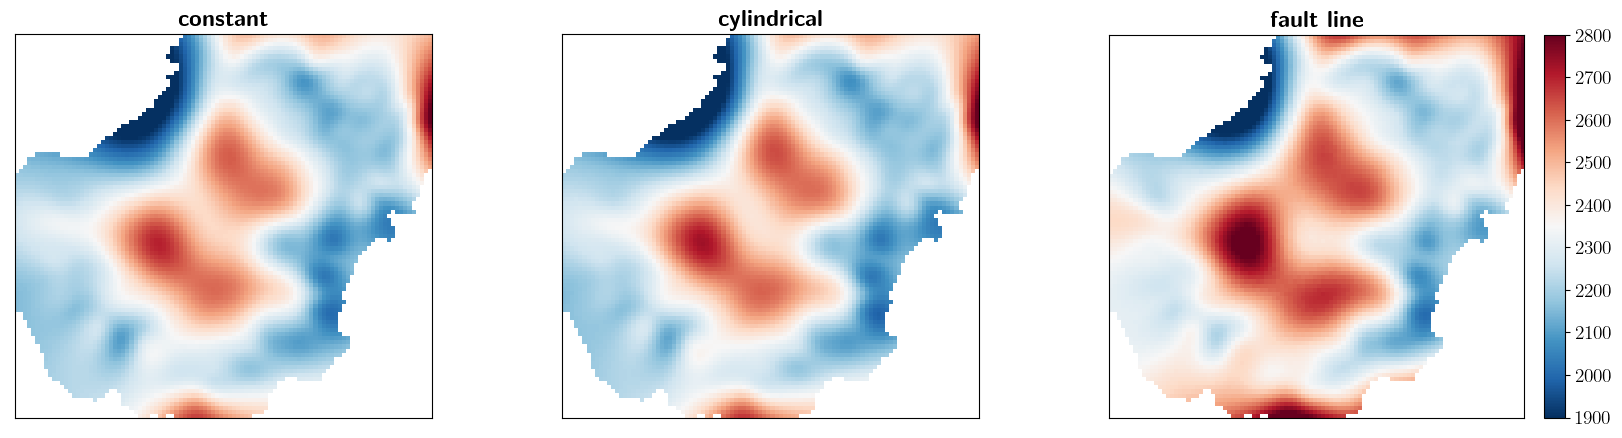

In [50]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

meshed_post_mean_cyl = grid.mesh_values(post_mean_cyl) + 1600
meshed_post_mean_cst = grid.mesh_values(post_mean_cst) + 1600
meshed_post_mean_N41 = grid.mesh_values(post_mean_N41) + 1600

zlevel = 14
print(grid.Z_mesh[0, 0, zlevel])


fig = plt.figure(figsize=(20, 8))                                          
plt.subplot(131)                                                      
ax = plt.imshow(meshed_post_mean_cst[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(ax, fraction=0.046, pad=0.04)
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{constant}$")

plt.subplot(132)                                                       
ax = plt.imshow(meshed_post_mean_cyl[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.colorbar(ax, fraction=0.046, pad=0.04)
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{cylindrical}$")


ax = plt.subplot(133)                                        
im = plt.imshow(meshed_post_mean_N41[:, :, zlevel].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.title(r"$\textbf{fault line}$")
plt.yticks([])
plt.xticks([])

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size="5%", pad=0.2)

cbar1 = fig.colorbar(im, cax = cax2)

fig.delaxes(fig.axes[1])
fig.delaxes(fig.axes[2])


plt.savefig("posterior_means_m100", bbox_inches='tight', dpi=200)

## Plot leave-one-out residuals.

In [41]:
residuals_loocv_cyl = np.load(os.path.join(results_folder, "residuals_loocv_cyl.npy"))
residuals_loocv_cst = np.load(os.path.join(results_folder, "residuals_loocv_cst.npy"))
residuals_loocv_N41 = np.load(os.path.join(results_folder, "residuals_loocv_N41.npy"))

In [42]:
print("Cylindrical {}".format(np.mean(residuals_loocv_cyl**2)))
print("Constant {}".format(np.mean(residuals_loocv_cst**2)))
print("N41 {}".format(np.mean(residuals_loocv_N41**2)))

Cylindrical 0.02485097199678421
Constant 0.02527175284922123
N41 0.02521257847547531


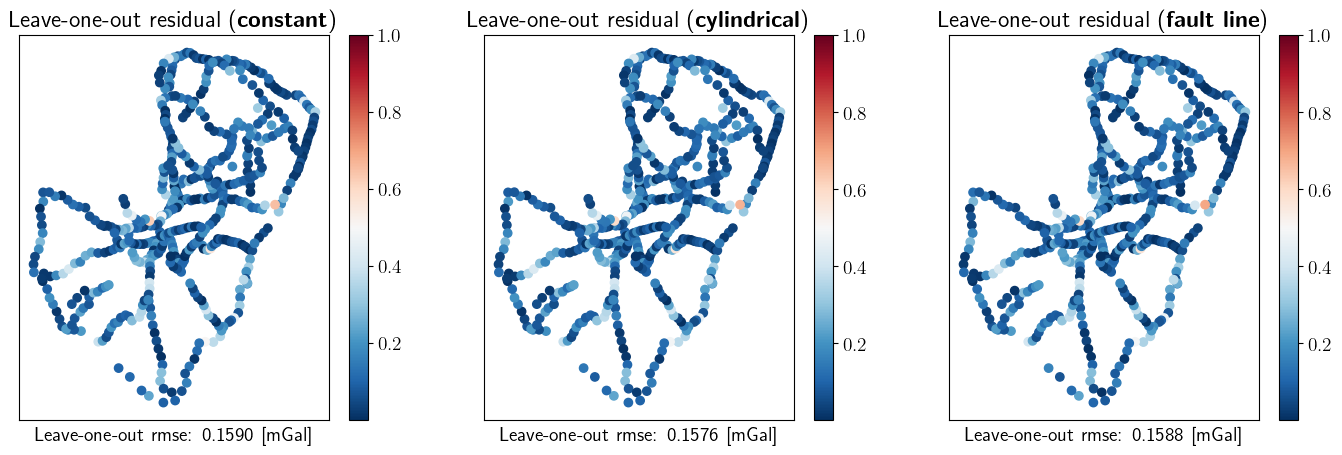

In [43]:
plt.figure(figsize=(17, 5))                                          
plt.subplot(131)   
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_cst), cmap='RdBu_r', vmax=1.0)
plt.colorbar()
plt.title(r"Leave-one-out residual ($\textbf{constant}$)")
plt.xlabel("Leave-one-out rmse: {:.4f} [mGal]".format(np.sqrt(np.mean(residuals_loocv_cst**2))))
plt.yticks([])
plt.xticks([])

plt.subplot(132)   
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_cyl), cmap='RdBu_r', vmax=1.0)
plt.colorbar()
plt.title(r"Leave-one-out residual ($\textbf{cylindrical}$)")
plt.xlabel("Leave-one-out rmse: {:.4f} [mGal]".format(np.sqrt(np.mean(residuals_loocv_cyl**2))))

plt.yticks([])
plt.xticks([])


plt.subplot(133)
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_N41), cmap='RdBu_r', vmax=1.0)
plt.colorbar()
plt.title(r"Leave-one-out residual ($\textbf{fault line}$)")
plt.yticks([])
plt.xticks([])
plt.xlabel("Leave-one-out rmse: {:.4f} [mGal]".format(np.sqrt(np.mean(residuals_loocv_N41**2))))
plt.savefig("loocv_residuals", bbox_inches='tight', dpi=200)

## Plot k-folds residuals.

In [44]:
residuals_kfolds_cyl = np.load(os.path.join(results_folder, "residuals_kfolds_cyl.npy"), allow_pickle=True)
residuals_kfolds_cst = np.load(os.path.join(results_folder, "residuals_kfolds_cst.npy"), allow_pickle=True)
residuals_kfolds_N41 = np.load(os.path.join(results_folder, "residuals_kfolds_N41.npy"), allow_pickle=True)

folds_inds = np.load(os.path.join(results_folder, "folds_inds.pkl"), allow_pickle=True)

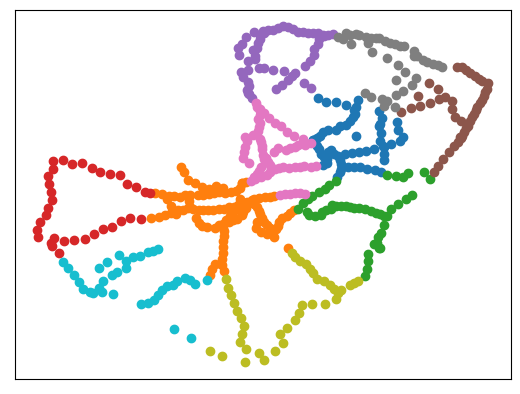

In [45]:
# Plot bare folds domain.
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1])
plt.yticks([])
plt.xticks([])
plt.savefig("fold_domains", bbox_inches='tight', dpi=200)

### Mean k-fold residuals.

In [46]:
flat_cst = [item for sublist in residuals_kfolds_cst for item in sublist]
print("k-fold rmse (constant): {}".format(np.sqrt(np.mean(np.array(flat_cst)**2))))
flat_cyl = [item for sublist in residuals_kfolds_cyl for item in sublist]
print("k-fold rmse (cylindrical): {}".format(np.sqrt(np.mean(np.array(flat_cyl)**2))))
flat_N41 = [item for sublist in residuals_kfolds_N41 for item in sublist]
print("k-fold rmse (fault line): {}".format(np.sqrt(np.mean(np.array(flat_N41)**2))))

k-fold rmse (constant): 2.905412988959685
k-fold rmse (cylindrical): 2.7725673335764127
k-fold rmse (fault line): 1.8109316216941196


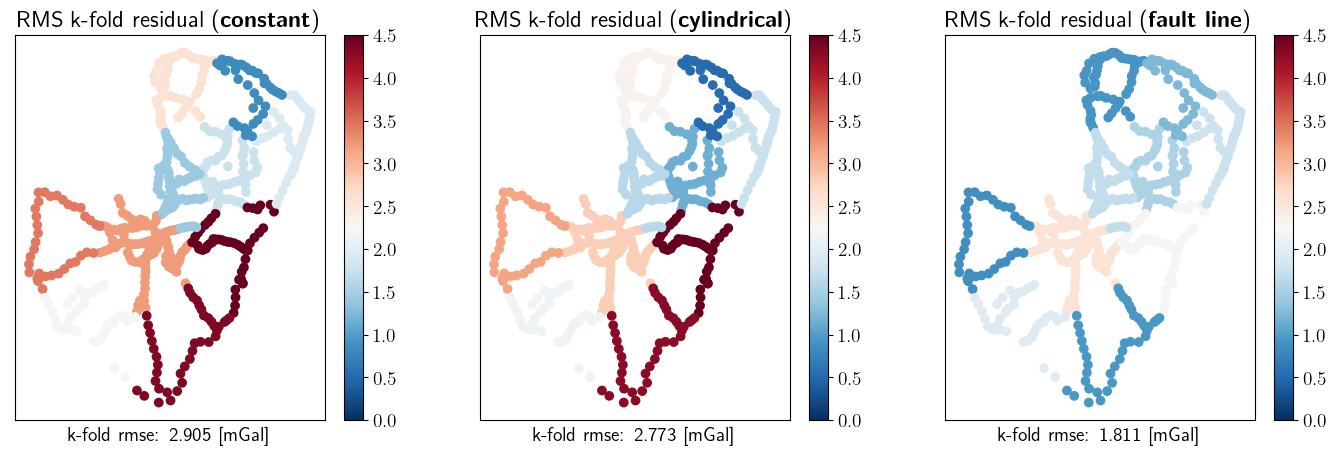

In [47]:
plt.figure(figsize=(17, 5))                                          
plt.subplot(131) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.sqrt(np.mean(residuals_kfolds_cst[i]**2)), len(fold)), vmin=0, vmax=4.5, cmap='RdBu_r')
plt.colorbar()
plt.title(r"RMS k-fold residual ($\textbf{constant}$)")
plt.xlabel("k-fold rmse: {:.3f} [mGal]".format(np.sqrt(np.mean(np.array(flat_cst)**2))))
plt.yticks([])
plt.xticks([])

plt.subplot(132) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.sqrt(np.mean(residuals_kfolds_cyl[i]**2)), len(fold)), vmin=0, vmax=4.5, cmap='RdBu_r')
plt.colorbar()
plt.title(r"RMS k-fold residual ($\textbf{cylindrical}$)")
plt.yticks([])
plt.xticks([])
plt.xlabel("k-fold rmse: {:.3f} [mGal]".format(np.sqrt(np.mean(np.array(flat_cyl)**2))))


plt.subplot(133) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.sqrt(np.mean(residuals_kfolds_N41[i]**2)), len(fold)), vmin=0, vmax=4.5, cmap='RdBu_r')
plt.colorbar()
plt.title(r"RMS k-fold residual ($\textbf{fault line}$)")
plt.yticks([])
plt.xticks([])
plt.xlabel("k-fold rmse: {:.3f} [mGal]".format(np.sqrt(np.mean(np.array(flat_N41)**2))))
plt.savefig("kfold_residuals", bbox_inches='tight', dpi=200)

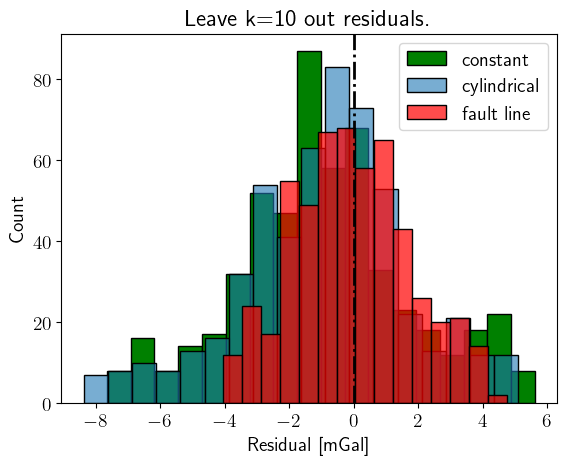

In [48]:
sns.histplot(flat_cst, color='g', alpha=1)
sns.histplot(flat_cyl, alpha=.6)
sns.histplot(flat_N41, color='r', alpha=.7)
plt.legend(['constant', 'cylindrical', 'fault line'])
plt.title("Leave k=10 out residuals.")
plt.xlabel("Residual [mGal]")
plt.axvline(0.0, color='k', linestyle='-.', lw=2)
plt.savefig("kfold_residuals_histogram", bbox_inches='tight', dpi=200)

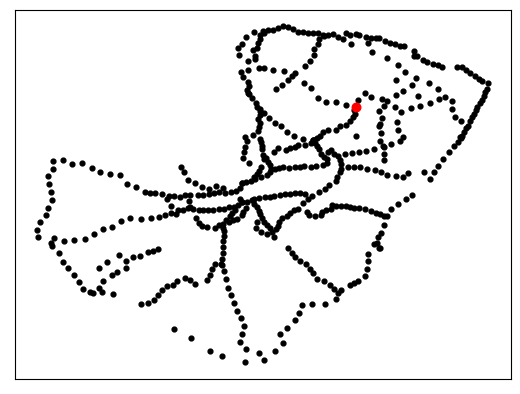

In [49]:
# Explicative plot for LOOCV.
# Plot bare folds domain.
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], color='k', s=12)

# Add one red point.
plt.scatter(data_coords[folds_inds[0][0], 0], data_coords[folds_inds[0][0], 1], color='r', s=38)

plt.yticks([])
plt.xticks([])
plt.savefig("loocv_domain", bbox_inches='tight', dpi=200)

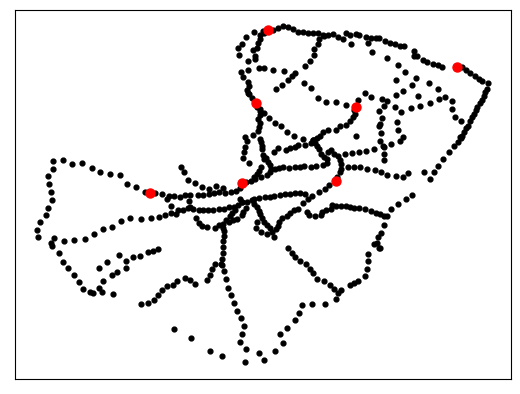

In [106]:
# Explicative plot for k-fold CV.
# Plot bare folds domain.
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], color='k', s=12)

# Add one red point.
plt.scatter(data_coords[folds_inds[0][0], 0], data_coords[folds_inds[0][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[1][0], 0], data_coords[folds_inds[1][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[2][0], 0], data_coords[folds_inds[2][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[3][0], 0], data_coords[folds_inds[3][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[4][0], 0], data_coords[folds_inds[4][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[5][0], 0], data_coords[folds_inds[5][0], 1], color='r', s=42)
plt.scatter(data_coords[folds_inds[6][0], 0], data_coords[folds_inds[6][0], 1], color='r', s=42)


plt.yticks([])
plt.xticks([])
plt.savefig("kfold_domain", bbox_inches='tight', dpi=200)